In [1]:
# ---------- DATASET ----------
from keras.datasets import mnist

# ---------- NETWORK ----------
import tensorflow

import sys
sys.path.append('..')
from utils import ImageAnalyzer

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)

In [4]:
mnist_model = ImageAnalyzer(img_width=28,img_height=28,channels=1,n_of_classes=10)

In [5]:
metrics = [tensorflow.keras.metrics.Recall(),
            tensorflow.keras.metrics.Precision(),
            tensorflow.keras.metrics.AUC(multi_label=True)]
mnist_model.compile(loss=tensorflow.keras.losses.CategoricalCrossentropy(), metrics= metrics)
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 2)         52        
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 4)         204       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 4)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 8)         808       
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                    

In [6]:
mnist_result = mnist_model.fit(x_train, y_train, batch_size=64, epochs=5, verbose=1)

Epoch 1/5
938/938 [==============================] - 67s 69ms/step - loss: 0.5044 - recall: 0.7960 - precision: 0.9504 - auc: 0.9829
Epoch 2/5
938/938 [==============================] - 67s 72ms/step - loss: 0.0899 - recall: 0.9719 - precision: 0.9776 - auc: 0.9980
Epoch 3/5
938/938 [==============================] - 68s 72ms/step - loss: 0.0662 - recall: 0.9795 - precision: 0.9830 - auc: 0.9986
Epoch 4/5
938/938 [==============================] - 70s 74ms/step - loss: 0.0551 - recall: 0.9832 - precision: 0.9861 - auc: 0.9987
Epoch 5/5
938/938 [==============================] - 70s 75ms/step - loss: 0.0484 - recall: 0.9856 - precision: 0.9878 - auc: 0.9989


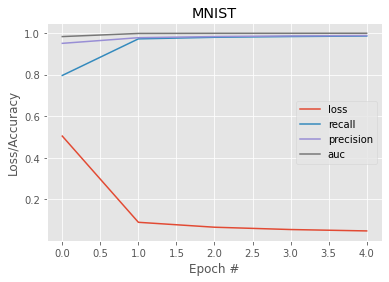

In [10]:
import matplotlib.pyplot as plt
import numpy as np



plt.plot(np.arange(0, 5), mnist_result.history["loss"], label="loss")
plt.plot(np.arange(0, 5), mnist_result.history["recall"], label="recall")
plt.plot(np.arange(0, 5), mnist_result.history["precision"], label="precision")
plt.plot(np.arange(0, 5), mnist_result.history["auc"], label="auc")
plt.title('MNIST')
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

plt.show() 